# Linear Regression (lineārā regresija)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
data['data']

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [5]:
data['target']

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [6]:
data['target_names']

['MedHouseVal']

In [7]:
housing = pd.DataFrame(data['data'], columns=data['feature_names'])
housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:
housing['MedHouseVal'] = data['target']
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
housing.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


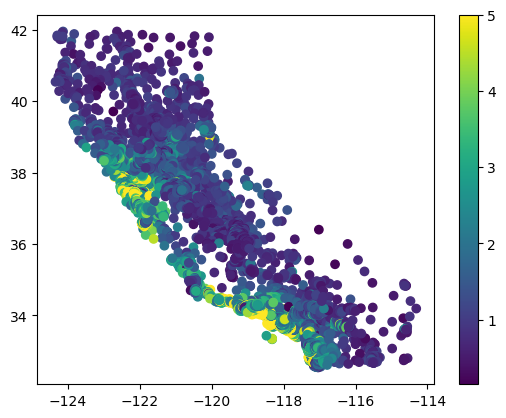

In [10]:
plt.scatter(data = housing , x="Longitude" , y="Latitude" , c =housing['MedHouseVal']  )
plt.colorbar ()
plt.show()

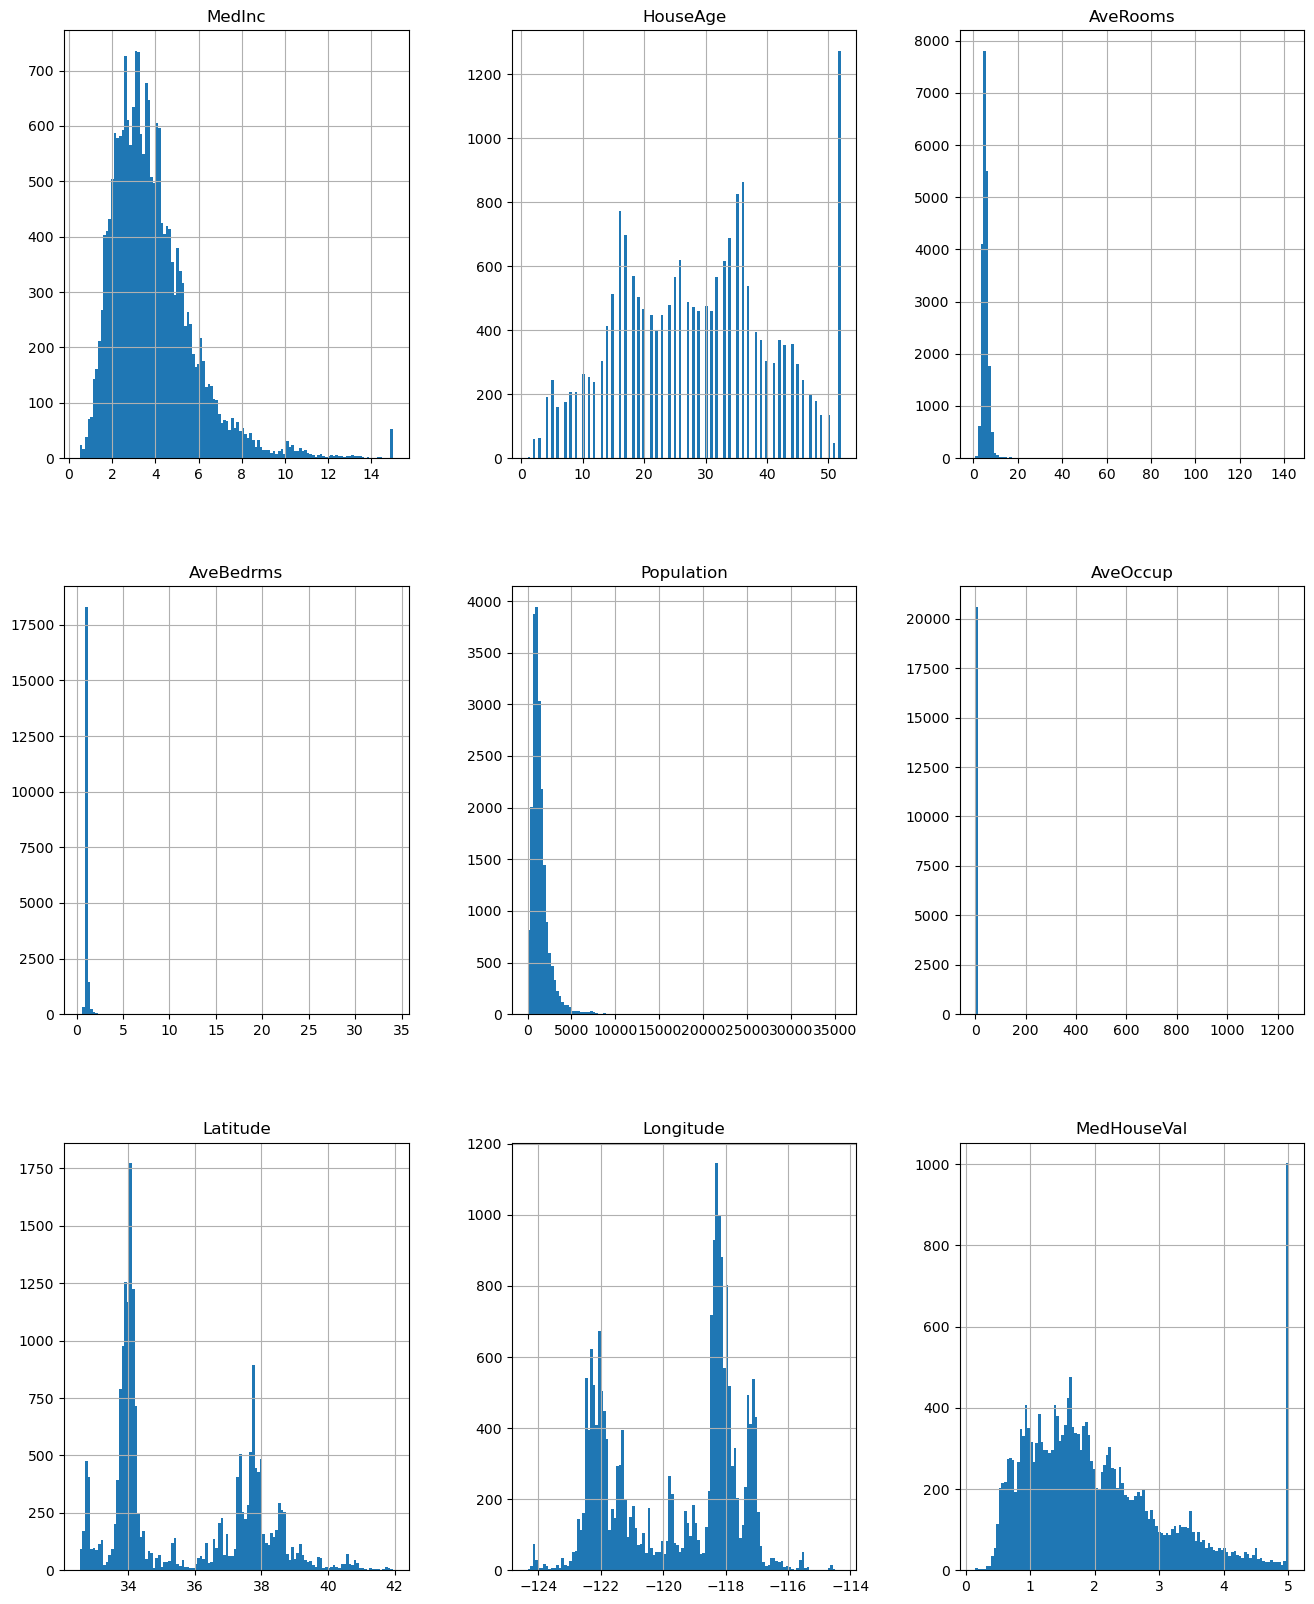

In [11]:
housing.hist(bins=120 , figsize=(16,20))
plt.show()

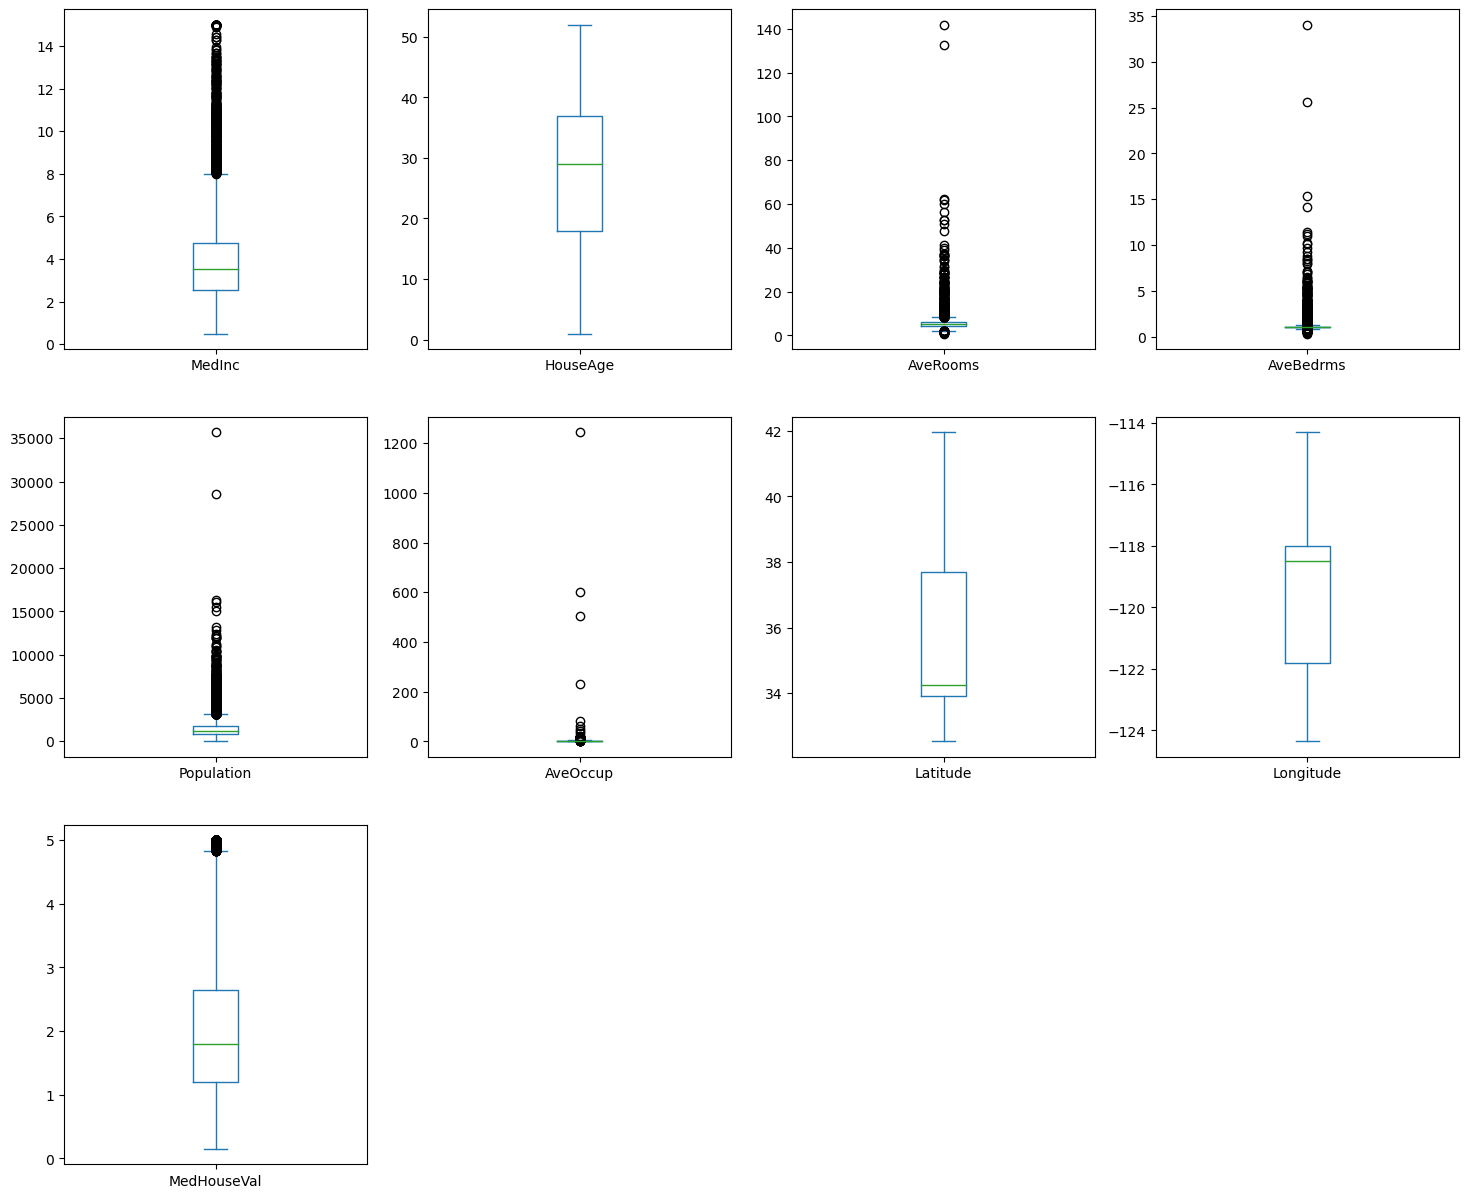

In [12]:
housing.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (3,4))
plt.show()

In [13]:
def outlier_limits(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL, LL

In [14]:
for column in housing.columns:
    if housing[column].dtype != 'object':
        UL, LL = outlier_limits(housing[column])
        housing[column] = np.where((housing[column] > UL), UL , np.where((housing[column] < LL), LL, housing[column]))

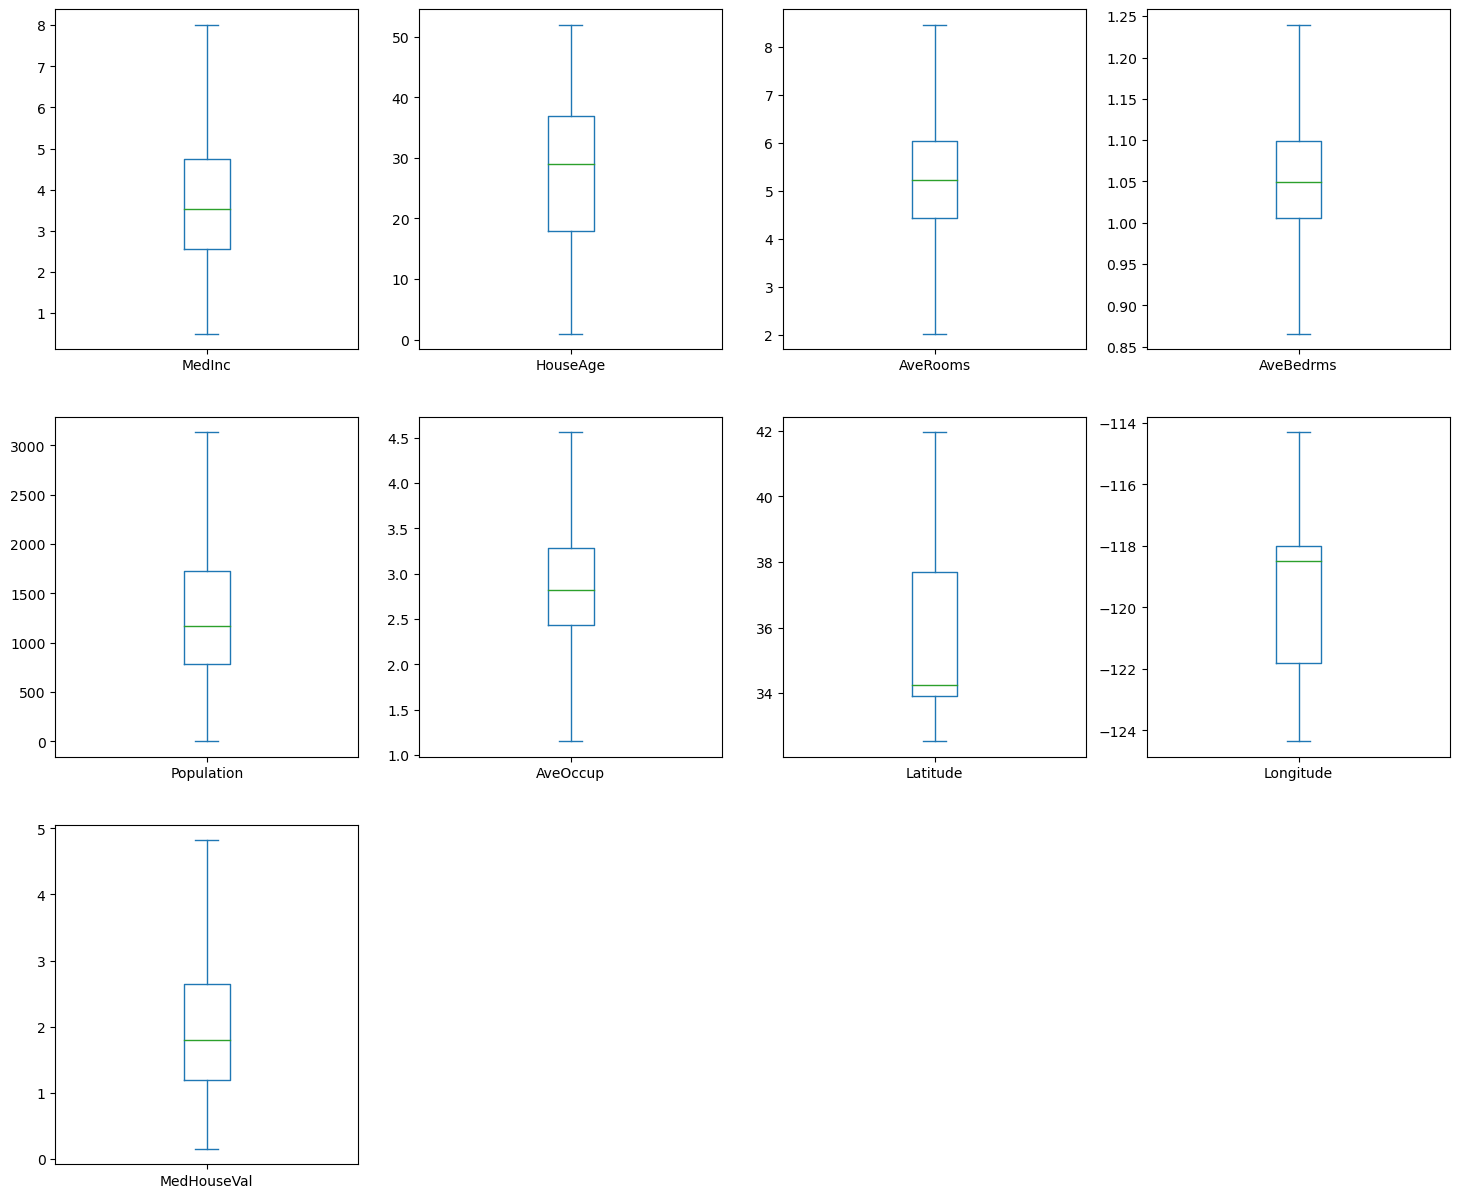

In [15]:
housing.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (3,4))
plt.show()

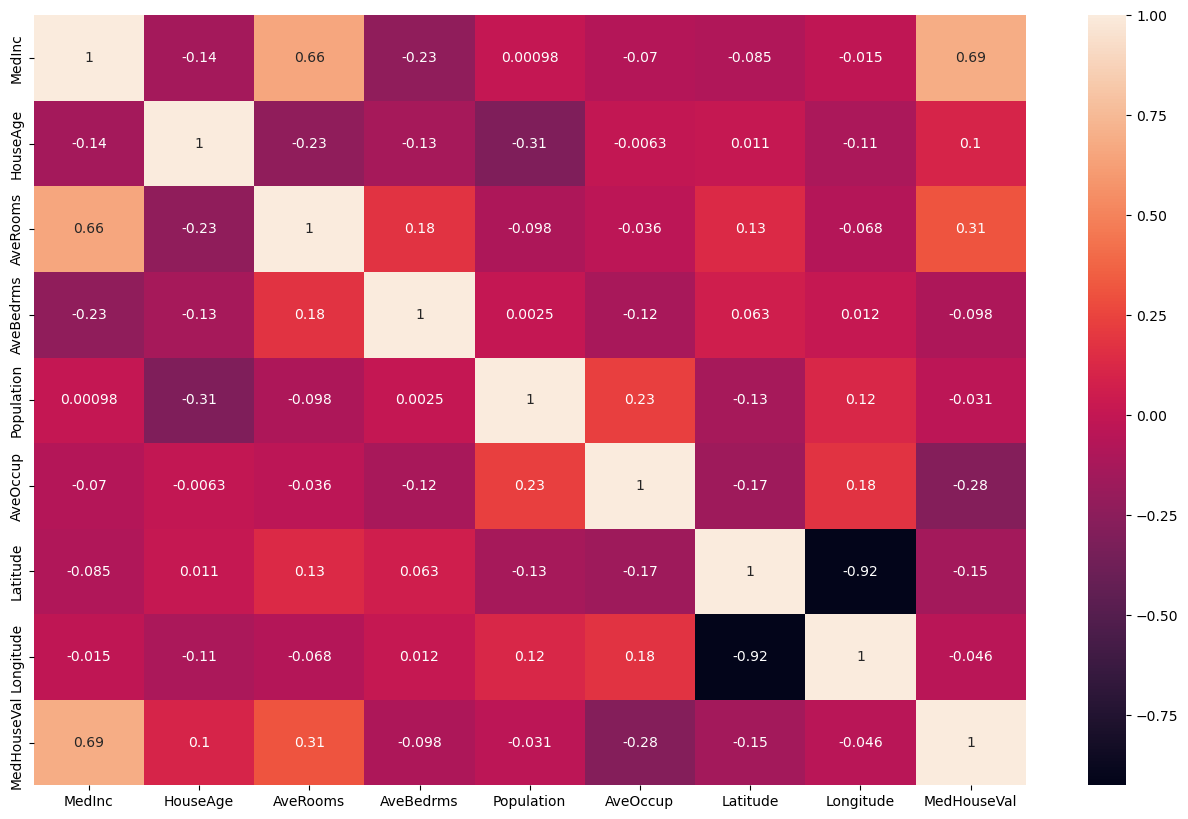

In [16]:
plt.figure(figsize=(16,10))
sns.heatmap(housing.corr(), cbar = True , annot=True)
plt.show()

In [17]:
X = housing.iloc[:, :-1].to_numpy()
y = housing.iloc[:, -1: ].to_numpy()

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25 , random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [21]:
X_train

array([[ 0.24450623,  0.66640687, -0.01822897, ..., -0.53333915,
        -0.8607415 ,  0.73099911],
       [ 0.92652523,  1.06288858,  0.84544157, ..., -0.71415986,
         0.70916822, -1.19670983],
       [ 0.06672962,  0.58711053,  0.64137266, ..., -0.95837379,
         1.31370062, -1.55128842],
       ...,
       [-0.52628064,  0.58711053, -1.06283176, ...,  0.62878678,
        -0.75764295,  0.60115343],
       [ 1.15079356, -1.07811266,  0.87034413, ...,  0.4070089 ,
         0.90599273, -1.1867217 ],
       [-0.74241894,  1.855852  , -1.53166514, ..., -1.14247279,
         0.99503238, -1.41644868]])

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
lr.score(X_train,y_train)

0.6723022941340079

In [24]:
lr.score(X_test,y_test)

0.6617799774514863

In [25]:
from sklearn.metrics import mean_squared_error
y_pred = lr.predict(X_test)
y_pred[ : 5]

array([[0.26481575],
       [1.98658228],
       [3.44078939],
       [2.74342799],
       [2.67525516]])

In [26]:
y_test[ :5]

array([[0.477   ],
       [0.458   ],
       [4.824125],
       [2.186   ],
       [2.78    ]])

In [27]:
X_test.shape

(5160, 8)

In [28]:
y_test.shape

(5160, 1)

In [29]:
y_pred.shape

(5160, 1)

In [30]:
housing1 = pd.DataFrame(X_test, columns=data['feature_names'])

In [31]:
housing1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5160 entries, 0 to 5159
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      5160 non-null   float64
 1   HouseAge    5160 non-null   float64
 2   AveRooms    5160 non-null   float64
 3   AveBedrms   5160 non-null   float64
 4   Population  5160 non-null   float64
 5   AveOccup    5160 non-null   float64
 6   Latitude    5160 non-null   float64
 7   Longitude   5160 non-null   float64
dtypes: float64(8)
memory usage: 322.6 KB


In [32]:
housing1['MedHouseVal'] = y_test

In [33]:
housing1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5160 entries, 0 to 5159
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       5160 non-null   float64
 1   HouseAge     5160 non-null   float64
 2   AveRooms     5160 non-null   float64
 3   AveBedrms    5160 non-null   float64
 4   Population   5160 non-null   float64
 5   AveOccup     5160 non-null   float64
 6   Latitude     5160 non-null   float64
 7   Longitude    5160 non-null   float64
 8   MedHouseVal  5160 non-null   float64
dtypes: float64(9)
memory usage: 362.9 KB


In [34]:
housing1["pred_med_price"] = y_pred
housing1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,pred_med_price
0,-1.272480,-0.301428,-0.877545,-0.427557,0.076265,1.404016,0.220757,0.258004,0.477000,0.264816
1,-0.756865,0.098348,-0.197930,1.715419,0.301189,-0.325602,-0.208883,0.033701,0.458000,1.986582
2,-0.181387,1.857360,-1.050056,1.620095,-0.030346,-2.231151,1.033336,-1.451688,4.824125,3.440789
3,1.187863,-0.941068,0.703951,-0.453618,0.483208,0.778694,-0.610502,0.402555,2.186000,2.743428
4,-0.032847,0.418168,0.165956,-0.355545,-0.351479,-0.608879,0.482276,-1.197477,2.780000,2.675255
...,...,...,...,...,...,...,...,...,...,...
5155,1.726707,1.777405,0.197420,-1.022029,-0.731118,-1.076768,-0.722582,0.552091,4.824125,4.033624
5156,-0.963997,0.098348,-0.623334,-1.389212,-1.200467,-0.607141,2.144794,-1.337044,0.632000,0.499176
5157,-0.978008,0.658034,-1.615613,0.006496,1.091670,2.391267,-0.731922,0.631844,1.177000,1.118747
5158,1.884952,-1.820574,1.681638,-0.330039,1.326995,-0.544152,1.364905,-0.763823,2.631000,2.701230


In [35]:
h = housing1["MedHouseVal"] - housing1["pred_med_price"]
mean_diff = h.mean() * 100000
mean_diff.round(2)

-659.18

In [36]:
lin_mse = mean_squared_error(y_test, y_pred)
lin_mse

0.4314924506443975

In [37]:
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.6568808496557024

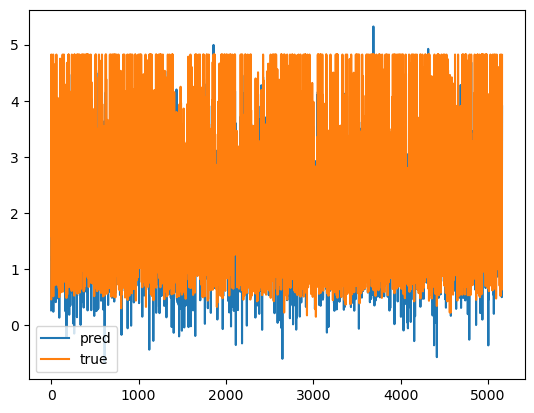

In [38]:
plt.plot(y_pred, label="pred")
plt.plot(y_test, label="true")
plt.legend()
plt.show()

# Logistic Regression (loģistika regresija)

In [34]:
import pandas as pd
from sklearn.datasets import load_wine

wine_data = load_wine()
wine_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [35]:
wine_data['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [36]:
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

wine_df["target"] = wine_data.target

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [37]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [38]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [39]:
from sklearn.preprocessing import StandardScaler

# Split data into features and label 
X = wine_data['data']
y = wine_data["target"]

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# View first instance
print(X_scaled[0])

[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
  1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
  1.01300893]


In [40]:
from sklearn.model_selection import train_test_split

# Split data into train and test
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y,
                                                                  train_size=0.7,
                                                                  random_state=25)

In [41]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()

In [42]:
logistic_regression.fit(X_train_scaled, y_train)

LogisticRegression()

In [43]:
log_reg_preds = logistic_regression.predict(X_test_scaled)

In [44]:
log_reg_preds

array([1, 0, 0, 0, 1, 1, 0, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2,
       0, 0, 2, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 0, 1,
       1, 2, 2, 0, 2, 0, 2, 2, 2, 1])

In [45]:
from sklearn.metrics import classification_report
target_names = wine_data['target_names']
print(classification_report(y_test, log_reg_preds, target_names=target_names))

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        17
     class_1       1.00      0.92      0.96        25
     class_2       0.86      1.00      0.92        12

    accuracy                           0.96        54
   macro avg       0.95      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



# Support Vector Machines (Atbalsta vektora Mašīnmācības algoritms)

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
 
# IRIS Data Set
 
iris = datasets.load_iris()
X = iris.data
y = iris.target
 
# Creating training and test split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y)
 
# Feature Scaling
 
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
 
# Training a SVM classifier using SVC class
svm = SVC(kernel= 'linear', random_state=1, C=0.1)
svm.fit(X_train_std, y_train)
 
# Mode performance
 
y_pred = svm.predict(X_test_std)
ac=accuracy_score(y_test, y_pred)
ac.round(2)

0.98

# Decisison Tree Classification (Lēmumu koka algoritms)

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
pima = pd.read_csv("diabetes.csv")

In [5]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
pima.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [7]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima.label

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [11]:
metrics.accuracy_score(y_test, y_pred).round(2)

0.68

# K-Means Clustering (K-Means Klāsterēšana)

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [14]:
housing = pd.DataFrame(data['data'], columns=data['feature_names'])
housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [15]:
housing['MedHouseVal'] = data['target']

In [16]:
housing.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [17]:
home_data = housing[['Latitude', 'Longitude', 'MedHouseVal']]

In [18]:
home_data.columns = ['longitude', 'latitude', 'median_house_value']

In [19]:
home_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   median_house_value  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


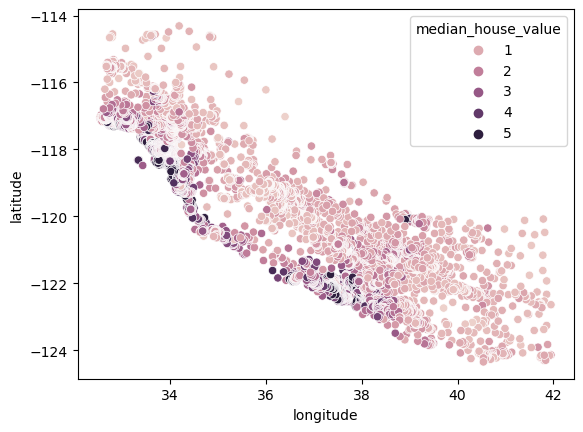

In [20]:
sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']],
                                                    home_data[['median_house_value']],
                                                    test_size=0.33, random_state=0)

In [22]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, n_init='auto', random_state=0)

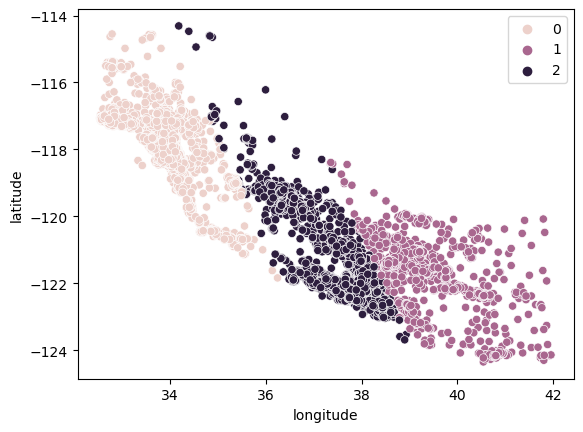

In [25]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)
plt.show()

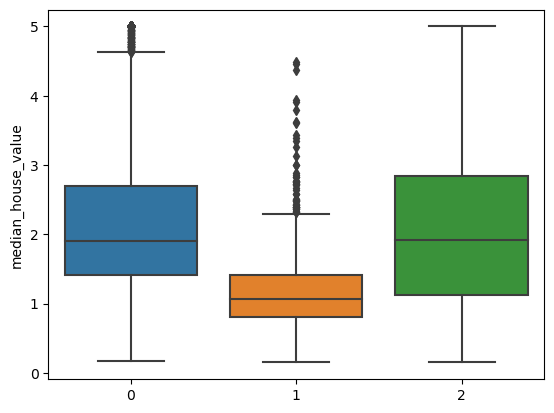

In [26]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'])
plt.show()

In [27]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean').round(2)

0.75

In [28]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

In [29]:
score

[0.7754128527619217,
 0.7499371920916679,
 0.6977084900318375,
 0.6404445378774195,
 0.6641273887742314,
 0.6411192393900361]

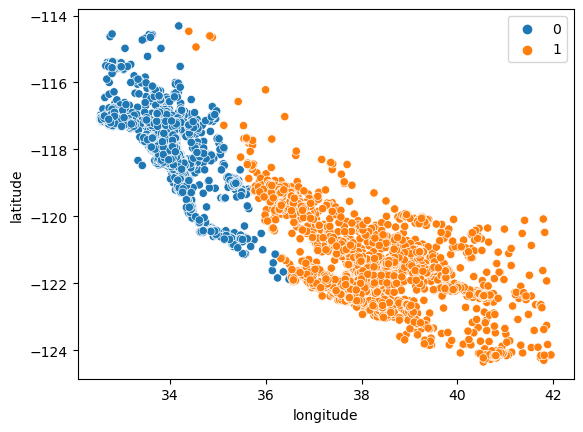

In [30]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[0].labels_)
plt.show()

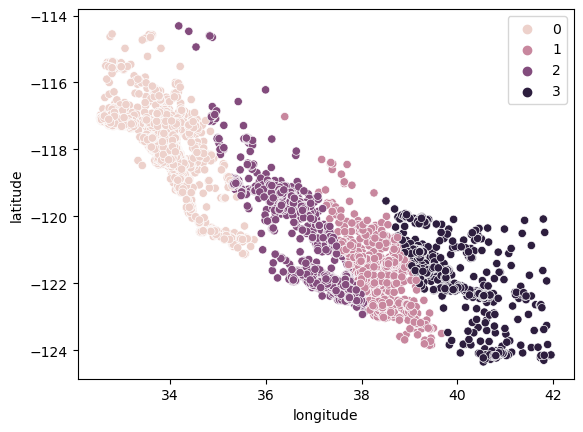

In [31]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_)
plt.show()

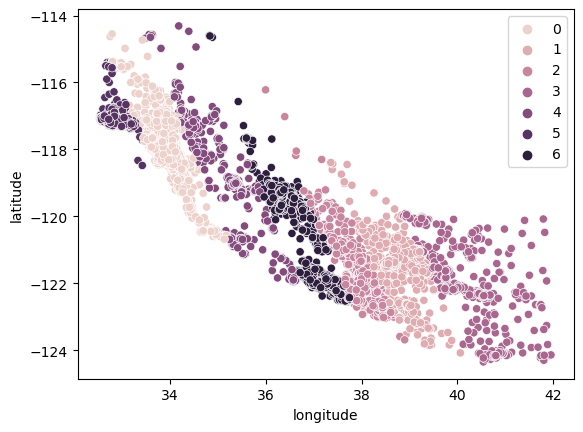

In [33]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[-1].labels_)
plt.show()

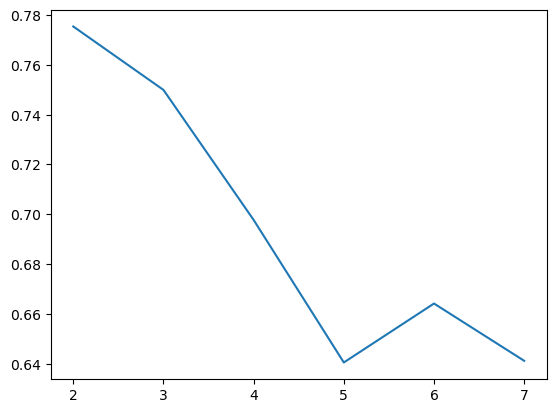

In [34]:
sns.lineplot(x = K, y = score)
plt.show()

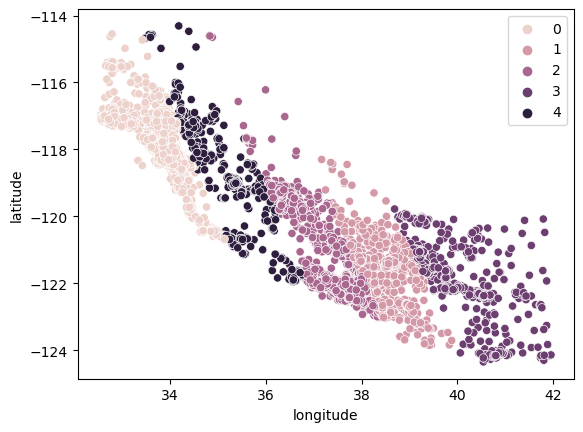

In [283]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[3].labels_)
plt.show()

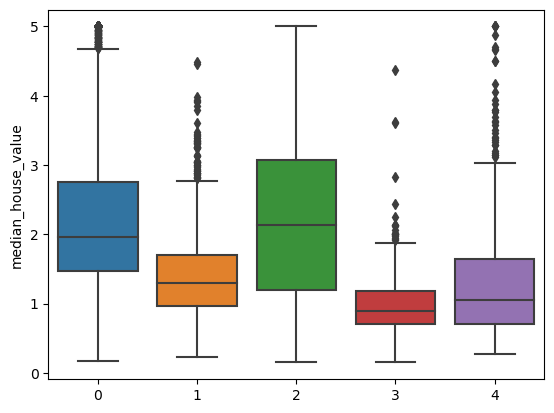

In [35]:
sns.boxplot(x = fits[3].labels_, y = y_train['median_house_value'])
plt.show()